## This is the 3rd assignment in the context of the course 'Computational Intelligence'

# 1st part :Investigate model performance for different design and training techniques

In [1]:

#first import libraries needed
from __future__ import print_function, absolute_import, division
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
#import MNIST dataset as well as matplotlib to create figures when needed
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras import regularizers
from tensorflow.keras import initializers
from tensorflow.keras import backend as K
import math


### A neural network of 2 hidden layers with 128 and 256 neurons respectively will be implemented and its behaviour will be assesed using different techniques. These include using minibatch samples, RMSprop optimizer, SGD optimizer, as well as techniques using normalizations with norms training  .

### The used dataset is the MNIST dataset , more info about the dataset on [this link](https://en.wikipedia.org/wiki/MNIST_database)

In [2]:
#define training parameters required, every other parameter gets its defualt value
batch_size = 256 
RMSprop_learning_rate=0.001
SGD_learning_rate=0.01
input_num_units = 28*28
output_num_units = 10

#define layer's number of neurons
layer1_neurons=128
layer2_neurons=256

#define number of training steps according to 100 epochs and batch size
epochs = 100
#training_dataset_size = 60000
#training_steps = (epochs * training_dataset_size)/batch_size
#training_steps= math.ceil(training_steps)#round up the number of steps


In [3]:
#prepare MNIST dataset, MNIST has 784 features and 10 classes of digits
(x_train, y_train),(x_test, y_test)= mnist.load_data()
#convert to type=float32
x_train, x_test = np.array(x_train,np.float32), np.array(x_test,np.float32)
#vectorize images to 1-D vector of 784 possible features (28X28)
x_train, x_test = x_train.reshape([-1, input_num_units]), x_test.reshape([-1,input_num_units])
# Normalize images value from [0, 255] to [0 , 1]( better values to work with)
 
#x_train = tf.keras.utils.normalize(x_train, axis=1)
#x_test = tf.keras.utils.normalize(x_train, axis=1)
print("Dimensions of training data: " + str(x_train.shape))

Dimensions of training data: (60000, 784)


In [4]:
#To test the proper functioning of our model 
#we create a validation set. We take a split size of 80:20 for train set vs validation set

split_size = int(x_train.shape[0]*0.8)
x_train, x_val = x_train[:split_size], x_train[split_size:]
y_train, y_val = y_train[:split_size], y_train[split_size:]
print(x_train.shape,x_val.shape)

(48000, 784) (12000, 784)


In [5]:
initializer = tf.keras.initializers.RandomNormal(mean=10)
#define two optimizers using keras module , one for the SGD optimizer and one for the RMSprop optimizer
opt1 = tf.keras.optimizers.SGD(learning_rate=SGD_learning_rate)
opt2_1 = tf.keras.optimizers.RMSprop(learning_rate=RMSprop_learning_rate,rho=0.01)
opt2_2 = tf.keras.optimizers.RMSprop(learning_rate=RMSprop_learning_rate,rho=0.99)
model1=tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape=(28*28, )),
    tf.keras.layers.Dense( layer1_neurons, activation='relu',  kernel_initializer=initializer),
    tf.keras.layers.Dense( layer2_neurons, activation='relu', kernel_initializer=initializer),
    tf.keras.layers.Dense(10, activation='softmax')
])
model2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28*28, )),
    tf.keras.layers.Dense( layer1_neurons, activation='relu'),
    tf.keras.layers.Dense( layer2_neurons, activation='relu') , 
    tf.keras.layers.Dense(10, activation='softmax')
])


#### Plot learning curves perfomance measures for training and validation tests after compiling and fitting the models to the data.

In [6]:

#use categorical cross entropy as objective function, use accuracy as a metric evaluation
model1.compile(optimizer=opt1,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model2.compile(optimizer=opt2_1,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
history1=model1.fit(x_train,y_train, validation_data=(x_val, y_val) ,batch_size=batch_size,epochs=100)
history2=model2.fit(x_train,y_train, validation_data=(x_val, y_val) ,batch_size=batch_size,epochs=100)


Epoch 1/100


C:\Users\nikol\anaconda3\envs\tensorflow_env\lib\site-packages\keras\backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


188/188 [==============================] - 1s 6ms/step - loss: 6063529.5000 - accuracy: 0.1128 - val_loss: 2.3023 - val_accuracy: 0.1060
Epoch 2/100
188/188 [==============================] - 1s 5ms/step - loss: 2.3019 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 3/100
188/188 [==============================] - 1s 3ms/step - loss: 2.3016 - accuracy: 0.1140 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 4/100
188/188 [==============================] - 1s 3ms/step - loss: 2.3014 - accuracy: 0.1140 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 5/100
188/188 [==============================] - 1s 3ms/step - loss: 2.3013 - accuracy: 0.1140 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 6/100
188/188 [==============================] - 1s 3ms/step - loss: 2.3012 - accuracy: 0.1140 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 7/100
188/188 [==============================] - 1s 3ms/step - loss: 2.3011 - accuracy: 0.1140 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch

Epoch 58/100
188/188 [==============================] - 1s 3ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 59/100
188/188 [==============================] - 1s 3ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 60/100
188/188 [==============================] - 1s 4ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 61/100
188/188 [==============================] - 1s 4ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 62/100
188/188 [==============================] - 1s 4ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 63/100
188/188 [==============================] - 1s 4ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 64/100
188/188 [==============================] - 1s 4ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy:

Epoch 15/100
188/188 [==============================] - 1s 5ms/step - loss: 0.2155 - accuracy: 0.9862 - val_loss: 1.0361 - val_accuracy: 0.9670
Epoch 16/100
188/188 [==============================] - 1s 4ms/step - loss: 0.2084 - accuracy: 0.9872 - val_loss: 1.0806 - val_accuracy: 0.9668
Epoch 17/100
188/188 [==============================] - 1s 5ms/step - loss: 0.2081 - accuracy: 0.9878 - val_loss: 1.2562 - val_accuracy: 0.9670
Epoch 18/100
188/188 [==============================] - 1s 4ms/step - loss: 0.1709 - accuracy: 0.9896 - val_loss: 1.2412 - val_accuracy: 0.9669
Epoch 19/100
188/188 [==============================] - 1s 5ms/step - loss: 0.1879 - accuracy: 0.9900 - val_loss: 1.2329 - val_accuracy: 0.9651
Epoch 20/100
188/188 [==============================] - 1s 4ms/step - loss: 0.1687 - accuracy: 0.9897 - val_loss: 1.2384 - val_accuracy: 0.9678
Epoch 21/100
188/188 [==============================] - 1s 5ms/step - loss: 0.1466 - accuracy: 0.9915 - val_loss: 1.2325 - val_accuracy:

Epoch 72/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0351 - accuracy: 0.9984 - val_loss: 2.1761 - val_accuracy: 0.9712
Epoch 73/100
188/188 [==============================] - 1s 5ms/step - loss: 0.0205 - accuracy: 0.9989 - val_loss: 2.0006 - val_accuracy: 0.9732
Epoch 74/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0151 - accuracy: 0.9990 - val_loss: 2.0282 - val_accuracy: 0.9744
Epoch 75/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0195 - accuracy: 0.9988 - val_loss: 2.1815 - val_accuracy: 0.9706
Epoch 76/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0341 - accuracy: 0.9984 - val_loss: 2.2018 - val_accuracy: 0.9729
Epoch 77/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0322 - accuracy: 0.9980 - val_loss: 2.0091 - val_accuracy: 0.9737
Epoch 78/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0193 - accuracy: 0.9989 - val_loss: 2.2872 - val_accuracy:

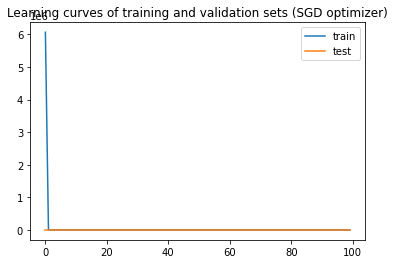

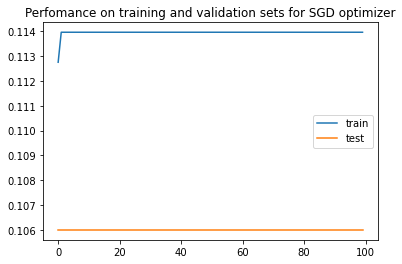

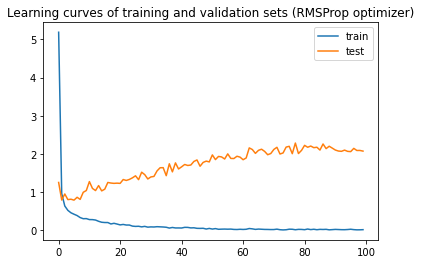

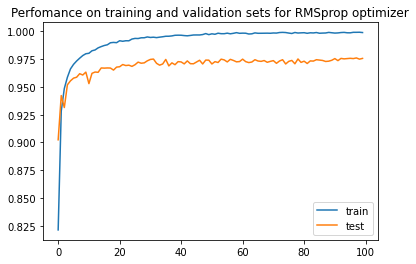

In [7]:
#plot figures of learning curves for both training techniques
plt.figure(1)
plt.plot(history1.history['loss'], label='train')
plt.plot(history1.history['val_loss'], label='test')
plt.legend()
plt.title('Learning curves of training and validation sets (SGD optimizer)')
plt.show()
plt.figure(2)
plt.plot(history1.history['accuracy'], label='train')
plt.plot(history1.history['val_accuracy'], label='test')
plt.legend()
plt.title('Perfomance on training and validation sets for SGD optimizer')
plt.show()
plt.figure(3)
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.legend()
plt.title('Learning curves of training and validation sets (RMSProp optimizer)')
plt.show()
plt.figure(4)
plt.plot(history2.history['accuracy'], label='train')
plt.plot(history2.history['val_accuracy'], label='test')
plt.legend()
plt.title('Perfomance on training and validation sets for RMSprop optimizer')
plt.show()

In [8]:
#Add l2-regularizer in both hidden layers, compile two models, one with RMSprop optimizer, one with SGD optimizer
model1_l2=tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape=(28*28, )),
    tf.keras.layers.Dense( layer1_neurons, activation='relu', kernel_regularizer=regularizers.l2(0.01), kernel_initializer=initializer),
    tf.keras.layers.Dense( layer2_neurons, activation='relu',kernel_regularizer=regularizers.l2(0.01), kernel_initializer=initializer) , 
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])
model2_l2=tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape=(28*28, )),
    tf.keras.layers.Dense( layer1_neurons, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense( layer2_neurons, activation='relu',kernel_regularizer=regularizers.l2(0.01)) , 
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])
model1_l2.compile(optimizer=opt1,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model2_l2.compile(optimizer=opt2_1,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
history1_l2=model1_l2.fit(x_train,y_train, validation_data=(x_val, y_val) ,batch_size=batch_size,epochs=100)
history2_l2=model2_l2.fit(x_train,y_train, validation_data=(x_val, y_val) ,batch_size=batch_size,epochs=100)


Epoch 1/100
188/188 [==============================] - 1s 4ms/step - loss: 9654726809164321914880.0000 - accuracy: 0.1138 - val_loss: 9397460369300642594816.0000 - val_accuracy: 0.1060
Epoch 2/100
188/188 [==============================] - 1s 4ms/step - loss: 9055470524397009240064.0000 - accuracy: 0.1140 - val_loss: 8716616873683886014464.0000 - val_accuracy: 0.1060
Epoch 3/100
188/188 [==============================] - 1s 3ms/step - loss: 8399412026379532763136.0000 - accuracy: 0.1140 - val_loss: 8085110311984973217792.0000 - val_accuracy: 0.1060
Epoch 4/100
188/188 [==============================] - 1s 3ms/step - loss: 7790880015229697130496.0000 - accuracy: 0.1140 - val_loss: 7499354130050657026048.0000 - val_accuracy: 0.1060
Epoch 5/100
188/188 [==============================] - 1s 3ms/step - loss: 7226440496231632338944.0000 - accuracy: 0.1140 - val_loss: 6956028049055658541056.0000 - val_accuracy: 0.1060
Epoch 6/100
188/188 [==============================] - 1s 3ms/step - loss: 

188/188 [==============================] - 1s 3ms/step - loss: 356809326505588948992.0000 - accuracy: 0.1140 - val_loss: 343457701722807336960.0000 - val_accuracy: 0.1060
Epoch 46/100
188/188 [==============================] - 1s 3ms/step - loss: 330958735013226479616.0000 - accuracy: 0.1140 - val_loss: 318574469356655214592.0000 - val_accuracy: 0.1060
Epoch 47/100
188/188 [==============================] - 1s 3ms/step - loss: 306981148384640892928.0000 - accuracy: 0.1140 - val_loss: 295493873110102310912.0000 - val_accuracy: 0.1060
Epoch 48/100
188/188 [==============================] - 1s 3ms/step - loss: 284740666982639075328.0000 - accuracy: 0.1140 - val_loss: 274085713214233903104.0000 - val_accuracy: 0.1060
Epoch 49/100
188/188 [==============================] - 1s 3ms/step - loss: 264111418716073230336.0000 - accuracy: 0.1140 - val_loss: 254228322110366810112.0000 - val_accuracy: 0.1060
Epoch 50/100
188/188 [==============================] - 1s 3ms/step - loss: 24497682016802701

Epoch 90/100
188/188 [==============================] - 1s 4ms/step - loss: 12095862657093992448.0000 - accuracy: 0.1140 - val_loss: 11643238799915352064.0000 - val_accuracy: 0.1060
Epoch 91/100
188/188 [==============================] - 1s 5ms/step - loss: 11219528800012337152.0000 - accuracy: 0.1140 - val_loss: 10799700076155371520.0000 - val_accuracy: 0.1060
Epoch 92/100
188/188 [==============================] - 1s 6ms/step - loss: 10406684042853351424.0000 - accuracy: 0.1140 - val_loss: 10017268910132297728.0000 - val_accuracy: 0.1060
Epoch 93/100
188/188 [==============================] - 1s 6ms/step - loss: 9652729128478048256.0000 - accuracy: 0.1140 - val_loss: 9291525265102471168.0000 - val_accuracy: 0.1060
Epoch 94/100
188/188 [==============================] - 1s 4ms/step - loss: 8953394653235773440.0000 - accuracy: 0.1140 - val_loss: 8618364664159404032.0000 - val_accuracy: 0.1060
Epoch 95/100
188/188 [==============================] - 1s 4ms/step - loss: 830473227087118336

188/188 [==============================] - 1s 5ms/step - loss: 0.4117 - accuracy: 0.9419 - val_loss: 0.3911 - val_accuracy: 0.9492
Epoch 45/100
188/188 [==============================] - 1s 4ms/step - loss: 0.3815 - accuracy: 0.9459 - val_loss: 0.4881 - val_accuracy: 0.9376
Epoch 46/100
188/188 [==============================] - 1s 4ms/step - loss: 0.4078 - accuracy: 0.9435 - val_loss: 0.5480 - val_accuracy: 0.9238
Epoch 47/100
188/188 [==============================] - 1s 4ms/step - loss: 0.4301 - accuracy: 0.9424 - val_loss: 0.3855 - val_accuracy: 0.9456
Epoch 48/100
188/188 [==============================] - 1s 4ms/step - loss: 0.3770 - accuracy: 0.9463 - val_loss: 0.5702 - val_accuracy: 0.9205
Epoch 49/100
188/188 [==============================] - 1s 4ms/step - loss: 0.4061 - accuracy: 0.9442 - val_loss: 0.4822 - val_accuracy: 0.9416
Epoch 50/100
188/188 [==============================] - 1s 4ms/step - loss: 0.3956 - accuracy: 0.9452 - val_loss: 0.6265 - val_accuracy: 0.9118
Epoch

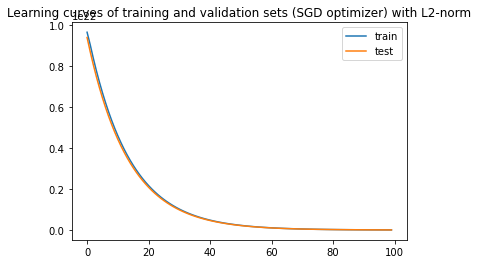

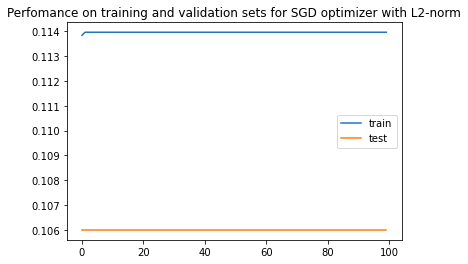

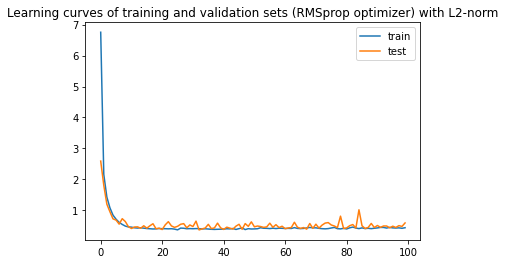

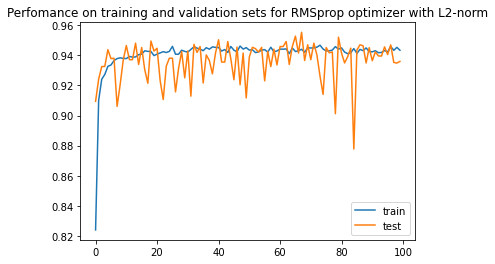

In [9]:
plt.figure(1)
plt.plot(history1_l2.history['loss'], label='train')
plt.plot(history1_l2.history['val_loss'], label='test')
plt.legend()
plt.title('Learning curves of training and validation sets (SGD optimizer) with L2-norm')
plt.show()
plt.figure(2)
plt.plot(history1_l2.history['accuracy'], label='train')
plt.plot(history1_l2.history['val_accuracy'], label='test')
plt.legend()
plt.title('Perfomance on training and validation sets for SGD optimizer with L2-norm')
plt.show()
plt.figure(3)
plt.plot(history2_l2.history['loss'], label='train')
plt.plot(history2_l2.history['val_loss'], label='test')
plt.legend()
plt.title('Learning curves of training and validation sets (RMSprop optimizer) with L2-norm')
plt.show()
plt.figure(4)
plt.plot(history2_l2.history['accuracy'], label='train')
plt.plot(history2_l2.history['val_accuracy'], label='test')
plt.legend()
plt.title('Perfomance on training and validation sets for RMSprop optimizer with L2-norm')
plt.show()

In [10]:
#Add l1-regularizer in both hidden layers, compile two models, one with RMSprop optimizer, one with SGD optimizer 
#( and weight initialization simultaneously)
#The models are now created using model.add option to place Dropout layers where needed.
#build first model to compile
model1_l1=models.Sequential([])
# add a dropout layer between every layer 
# input layer
model1_l1.add(layers.Flatten( input_shape=(28*28, )))

#first hidden layer
model1_l1.add(layers.Dense( layer1_neurons, activation='relu', kernel_regularizer=regularizers.l1(0.01),kernel_initializer=initializer))

model1_l1.add(layers.Dropout(0.3))
#second hidden layer
model1_l1.add(layers.Dense( layer2_neurons, activation='relu',kernel_regularizer=regularizers.l1(0.01),kernel_initializer=initializer) )

    #output layer
model1_l1.add(layers.Dense(10, activation=tf.keras.activations.softmax))

#build second model to compile

model2_l1=models.Sequential([])

model2_l1.add(layers.Flatten( input_shape=(28*28, )))

model2_l1.add(layers.Dense( layer1_neurons, activation='relu', kernel_regularizer=regularizers.l1(0.01)))

model2_l1.add(layers.Dropout(0.3))

model2_l1.add(layers.Dense( layer2_neurons, activation='relu',kernel_regularizer=regularizers.l1(0.01)) )
    
model2_l1.add(layers.Dense(10, activation=tf.keras.activations.softmax))
#compile models, only thing that differentiates the compilization is the optimizer
model1_l1.compile(optimizer=opt1,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model2_l1.compile(optimizer=opt2_2,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
history1_l1=model1_l1.fit(x_train,y_train, validation_data=(x_val, y_val) ,batch_size=batch_size,epochs=100)
history2_l1=model2_l1.fit(x_train,y_train, validation_data=(x_val, y_val) ,batch_size=batch_size,epochs=100)

Epoch 1/100
188/188 [==============================] - 1s 5ms/step - loss: 1517751107584.0000 - accuracy: 0.1077 - val_loss: 51961901056.0000 - val_accuracy: 0.1060
Epoch 2/100
188/188 [==============================] - 1s 4ms/step - loss: 51961819136.0000 - accuracy: 0.1140 - val_loss: 51961901056.0000 - val_accuracy: 0.1060
Epoch 3/100
188/188 [==============================] - 1s 3ms/step - loss: 51961819136.0000 - accuracy: 0.1140 - val_loss: 51961901056.0000 - val_accuracy: 0.1060
Epoch 4/100
188/188 [==============================] - 1s 4ms/step - loss: 51961819136.0000 - accuracy: 0.1140 - val_loss: 51961901056.0000 - val_accuracy: 0.1060
Epoch 5/100
188/188 [==============================] - 1s 4ms/step - loss: 51961819136.0000 - accuracy: 0.1140 - val_loss: 51961901056.0000 - val_accuracy: 0.1060
Epoch 6/100
188/188 [==============================] - 1s 4ms/step - loss: 51961819136.0000 - accuracy: 0.1140 - val_loss: 51961901056.0000 - val_accuracy: 0.1060
Epoch 7/100
188/188 

Epoch 51/100
188/188 [==============================] - 1s 4ms/step - loss: 51961819136.0000 - accuracy: 0.1140 - val_loss: 51961901056.0000 - val_accuracy: 0.1060
Epoch 52/100
188/188 [==============================] - 1s 4ms/step - loss: 51961819136.0000 - accuracy: 0.1140 - val_loss: 51961901056.0000 - val_accuracy: 0.1060
Epoch 53/100
188/188 [==============================] - 1s 4ms/step - loss: 51961819136.0000 - accuracy: 0.1140 - val_loss: 51961901056.0000 - val_accuracy: 0.1060
Epoch 54/100
188/188 [==============================] - 1s 4ms/step - loss: 51961819136.0000 - accuracy: 0.1140 - val_loss: 51961901056.0000 - val_accuracy: 0.1060
Epoch 55/100
188/188 [==============================] - 1s 4ms/step - loss: 51961819136.0000 - accuracy: 0.1140 - val_loss: 51961901056.0000 - val_accuracy: 0.1060
Epoch 56/100
188/188 [==============================] - 1s 4ms/step - loss: 51961819136.0000 - accuracy: 0.1140 - val_loss: 51961901056.0000 - val_accuracy: 0.1060
Epoch 57/100
188

Epoch 1/100
188/188 [==============================] - 2s 5ms/step - loss: 34.0613 - accuracy: 0.6549 - val_loss: 19.3339 - val_accuracy: 0.8391
Epoch 2/100
188/188 [==============================] - 1s 5ms/step - loss: 13.4691 - accuracy: 0.7830 - val_loss: 8.8746 - val_accuracy: 0.7546
Epoch 3/100
188/188 [==============================] - 1s 5ms/step - loss: 6.0652 - accuracy: 0.7841 - val_loss: 4.0152 - val_accuracy: 0.8328
Epoch 4/100
188/188 [==============================] - 1s 5ms/step - loss: 3.6368 - accuracy: 0.7623 - val_loss: 2.1840 - val_accuracy: 0.8952
Epoch 5/100
188/188 [==============================] - 1s 5ms/step - loss: 2.1865 - accuracy: 0.8024 - val_loss: 2.2957 - val_accuracy: 0.7117
Epoch 6/100
188/188 [==============================] - 1s 5ms/step - loss: 1.9907 - accuracy: 0.7922 - val_loss: 1.8542 - val_accuracy: 0.8514
Epoch 7/100
188/188 [==============================] - 1s 5ms/step - loss: 1.8231 - accuracy: 0.8073 - val_loss: 1.9534 - val_accuracy: 0.7

Epoch 58/100
188/188 [==============================] - 1s 5ms/step - loss: 1.6301 - accuracy: 0.7929 - val_loss: 1.5790 - val_accuracy: 0.8088
Epoch 59/100
188/188 [==============================] - 1s 5ms/step - loss: 1.7207 - accuracy: 0.7805 - val_loss: 1.3549 - val_accuracy: 0.8940
Epoch 60/100
188/188 [==============================] - 1s 5ms/step - loss: 1.5296 - accuracy: 0.8090 - val_loss: 1.7973 - val_accuracy: 0.7409
Epoch 61/100
188/188 [==============================] - 1s 5ms/step - loss: 1.6148 - accuracy: 0.7942 - val_loss: 1.3921 - val_accuracy: 0.9038
Epoch 62/100
188/188 [==============================] - 1s 5ms/step - loss: 1.6264 - accuracy: 0.7942 - val_loss: 1.3706 - val_accuracy: 0.8809
Epoch 63/100
188/188 [==============================] - 1s 5ms/step - loss: 1.6374 - accuracy: 0.7847 - val_loss: 1.5011 - val_accuracy: 0.8409
Epoch 64/100
188/188 [==============================] - 1s 5ms/step - loss: 1.5931 - accuracy: 0.8030 - val_loss: 1.4613 - val_accuracy:

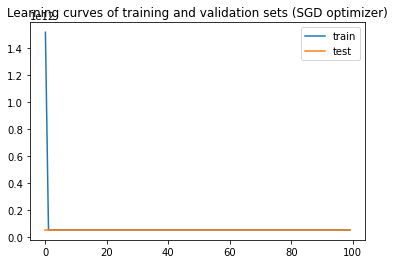

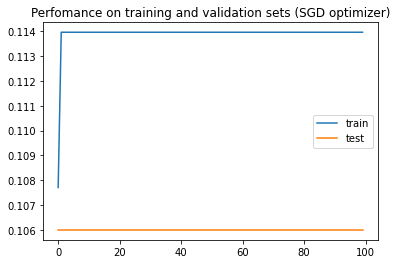

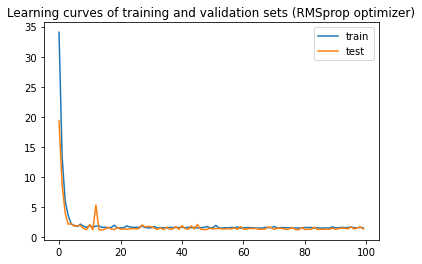

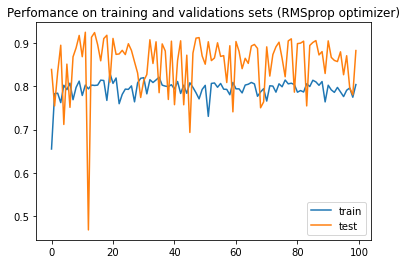

In [11]:
plt.figure(1)
plt.plot(history1_l1.history['loss'], label='train')
plt.plot(history1_l1.history['val_loss'], label='test')
plt.legend()
plt.title('Learning curves of training and validation sets (SGD optimizer)')
plt.show()
plt.figure(2)
plt.plot(history1_l1.history['accuracy'], label='train')
plt.plot(history1_l1.history['val_accuracy'], label='test')
plt.legend()
plt.title('Perfomance on training and validation sets (SGD optimizer)')
plt.show()
plt.figure(3)
plt.plot(history2_l1.history['loss'], label='train')
plt.plot(history2_l1.history['val_loss'], label='test')
plt.legend()
plt.title('Learning curves of training and validation sets (RMSprop optimizer)')
plt.show()
plt.figure(4)
plt.plot(history2_l1.history['accuracy'], label='train')
plt.plot(history2_l1.history['val_accuracy'], label='test')
plt.legend()
plt.title('Perfomance on training and validations sets (RMSprop optimizer)')
plt.show()

# 2nd Part: Network Fine tuning

In [12]:
#Import keras tuner to help create hypermodels of our model
import keras_tuner as kt
from tensorflow.keras import callbacks

In [13]:
# new variables are have a _tune suffix to differentiate them from the previous training variables 
(x_train_tune, y_train_tune), (x_test_tune, y_test_tune)= mnist.load_data() 
# Normalize pixel values between 0 and  1
x_train_tune = x_train_tune.astype('float32')/255.0
x_test_tune = x_test_tune.astype('float32')/255.0

# Define the model using a function method
The model used for tuning of hyperparameters is called hypermodel.Define hypermodel using a build function

In [14]:
from keras import backend as K
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn import metrics
# since metrics have been removed from Keras core, we calculate them manually using custom functions
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [15]:
#define initializer, the network is built according to the assignment's requirements
Heinitializer = tf.keras.initializers.HeNormal()
def build_model(hyperparameters):
    hp_units1=hyperparameters.Int('units_1',min_value=64, max_value=128,step=64)
    hp_units2=hyperparameters.Int('units_2',min_value=256, max_value=512,step=256)
    model=tf.keras.Sequential()
    model.add(layers.Flatten( input_shape=(28*28, )))
    #Tune the number of units in the first Dense layer
    #Choose an optional value between 64 and 128 for the first layer and between 256 and 512 for the second
    hp_regularizer=hyperparameters.Choice('regularizers',values=[0.1,0.001,0.000001])
    #add the first hidden layer
    model.add(layers.Dense(units=hp_units1,activation='relu',kernel_initializer=Heinitializer,kernel_regularizer=regularizers.l2(hp_regularizer)))
    #add the second hidden layer
    model.add(layers.Dense(units=hp_units2,activation='relu',kernel_initializer=Heinitializer,kernel_regularizer=regularizers.l2(hp_regularizer)))
    #add output layer
    model.add(layers.Dense(10,activation='softmax'))
    #Now tune the learning rate for the optimizer
    hp_learning_rate=hyperparameters.Choice('learning_rate',values=[0.1,0.01,0.001])
    #compile the model using RMSprop optimizer and fmeasure as a metric, loss function remains categorical cross-entropy
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=hp_learning_rate),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy', f1_score, precision_m, recall_m])
    return model


## Instantiate tuner and perform grid search using the Hyperband class

In [16]:
tuner=kt.Hyperband(build_model,objective='val_accuracy',max_epochs=10,directory='my_dir',project_name='My_tuner',overwrite=True)


Define early stopping callback to get optimal number of training epochs

In [17]:
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=200)

In [18]:
#fit the model 
tuner.search(x_train_tune, y_train_tune, epochs=1000, validation_split=0.2,callbacks=[early_stop])


Trial 30 Complete [00h 00m 31s]
val_accuracy: 0.9745000004768372

Best val_accuracy So Far: 0.9749166369438171
Total elapsed time: 00h 07m 22s
INFO:tensorflow:Oracle triggered exit


In [19]:

# Train a model based on the best hyperparameters gained from the tuning process, 10 epochs is considered ok now since
#our model is supposed to be working fine already due to the best built model considering its tuned hyperparameters
best_hyperparams=tuner.get_best_hyperparameters(num_trials=1)[0]
h_model = tuner.hypermodel.build(best_hyperparams)
h_model.summary()
history_hypermodel=h_model.fit(x_train_tune, y_train_tune, epochs=50, validation_split=0.2)



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 69,450
Trainable params: 69,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2714 - accuracy: 0.9195 - f1_score: 1.2951 - precision_m: 5273333.0000 - recall_m: 1.2889 - val_loss: 0.1512 - val_accuracy: 0.9549 - val_f1_score: 1.0907 - val_precision_m

Epoch 23/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0167 - accuracy: 0.9956 - f1_score: 0.9545 - precision_m: 0.9084 - recall_m: 1.0075 - val_loss: 0.2303 - val_accuracy: 0.9743 - val_f1_score: 0.9652 - val_precision_m: 0.9181 - val_recall_m: 1.0191
Epoch 24/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0185 - accuracy: 0.9951 - f1_score: 0.9553 - precision_m: 0.9090 - recall_m: 1.0082 - val_loss: 0.2103 - val_accuracy: 0.9725 - val_f1_score: 0.9669 - val_precision_m: 0.9197 - val_recall_m: 1.0207
Epoch 25/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0169 - accuracy: 0.9955 - f1_score: 0.9548 - precision_m: 0.9087 - recall_m: 1.0078 - val_loss: 0.2410 - val_accuracy: 0.9718 - val_f1_score: 0.9653 - val_precision_m: 0.9182 - val_recall_m: 1.0192e:
Epoch 26/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0171 - accuracy: 0.9959 - f1_score: 0.9546 - precision_m: 0.9083 - recall_m: 1.0075 - va

In [20]:
eval_result=h_model.evaluate(x_test_tune,y_test_tune)
print('[test loss,test accuracy,F1_score,Precision,Recall]',eval_result )

313/313 [==============================] - 1s 2ms/step - loss: 0.2709 - accuracy: 0.9727 - f1_score: 0.9608 - precision_m: 0.9145 - recall_m: 1.0135
[test loss,test accuracy,F1_score,Precision,Recall] [0.27087193727493286, 0.9726999998092651, 0.9607725143432617, 0.9145463705062866, 1.0134588479995728]


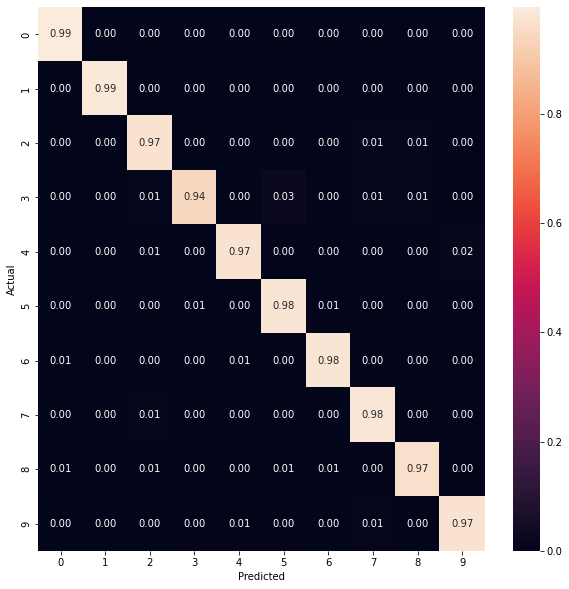

In [21]:
# compute confusion matrix and plot using seaborn to better visualize results
y_pred=h_model.predict(x_test_tune)
con_mat = metrics.confusion_matrix(y_test_tune,y_pred.argmax(axis=1))
normed_conf = (con_mat.T / con_mat.astype(np.float).sum(axis=1)).T

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(normed_conf, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

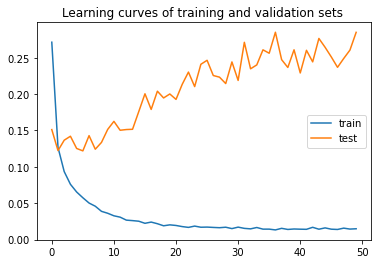

In [22]:
#learning curves for training and validation data
plt.figure(1)
plt.plot(history_hypermodel.history['loss'], label='train')
plt.plot(history_hypermodel.history['val_loss'], label='test')
plt.legend()
plt.title('Learning curves of training and validation sets ')
plt.show()